### Описание проекта

Дано: данные клиентов страховой компании «Хоть потоп». 

Задача:  разработать метод преобразования данных, который не позволит восстановить персональную информацию. 

Цель: защита данных без снижения качетсва модели машинного обучения.

<a id='Назад к оглавлению'></a>

### План Исследования

#### Поделим наще исследование на несколько частей.

#### Часть 1. Анализ общей информации
<a href='#Анализ общей информации'> 1.1 Загрузка библиотек, чтение данных и анализ общей информации</a>

#### Часть 2. Предобработка данных
<a href='#Предобработка данных и разбиение на выборки'> 2.1 Предобработка данных и разбиение на выборки</a>

#### Часть 3. Построение модели
<a href='#Разработка модели Линейной регрессии'> 3.1 Разработка модели Линейной регрессии</a>

#### Часть 4. Анонимизация клиентских данных

<a href='#4.1 Теоретическое обоснование'> 4.1 Теоретическое обоснование</a>

<a href='#4.2 Зашифровка данных путем умножения матрицы признаков на обратимую матрицу'> 4.2 Зашифровка данных путем умножения матрицы признаков на обратимую матрицу</a>

<a href='#4.3 Зашифровка данных путем умножения на вектор и прибавления константного значения'> 4.3 Зашифровка данных путем умножения на вектор и прибавления константного значения</a>

#### Часть 5. Общий вывод
<a href='#5 Общий вывод'> 5.1 Общий вывод</a>

<a id='Анализ общей информации'></a>

### Часть 1. Анализ данных

#### 1.1 Загрузка библиотек, чтение данных и анализ общей информации

In [1]:
# Для анализа данных будем использовать библиотеку pandas_profiling.
# Установим библиотеку и изменим версию pandas c которой profiling работает стабильно
#!pip install pandas_profiling==1.4.1
#!pip install pandas==0.25.3

In [2]:
# Импортируем библиотеки, с помощью которых будем обрабатывать данные
import pandas_profiling # для анализа статистик и распределений данных
import pandas as pd # для работы с табличными данными
import numpy as np # для работы с матрицами и векторами

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Игнорирование предупреждения об ошибках
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Прочитаем данные из файла и запишем в переменную df
df = pd.read_csv('/datasets/insurance.csv')

In [4]:
# Используем метод info для определения типов данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# Запусим библиотеку pandas_profiling и посмотрим как выглядят статистики 
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,195.4 KiB
Average record size in memory,40.0 B
Numeric,4
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Инструмент pandas_profiling позволяет изучить основную информацию о значениях и статистиках по признакам. Автоматический анализатор позволяет быстро получить информацию о типах данных, распределениях, наличиях пропусков и дублей в наборе данных. Так же можно увидеть информацию о корреляции между признаками или признаками и целевой переменной. Данный инструмент не позволяет ответить на все вопросы о наших данных, но помогает довольно быстро оценить основные проблемы, присутствующие в данных и определиться с инструментами для более детального анализа.

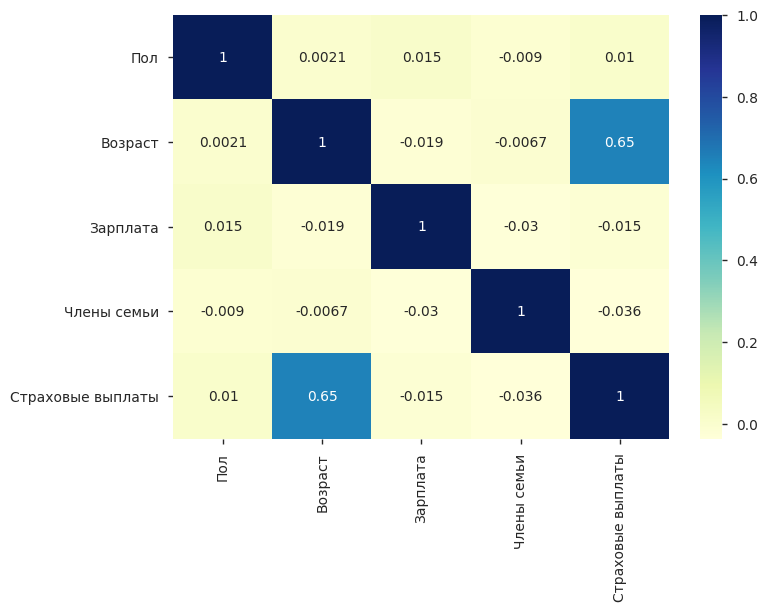

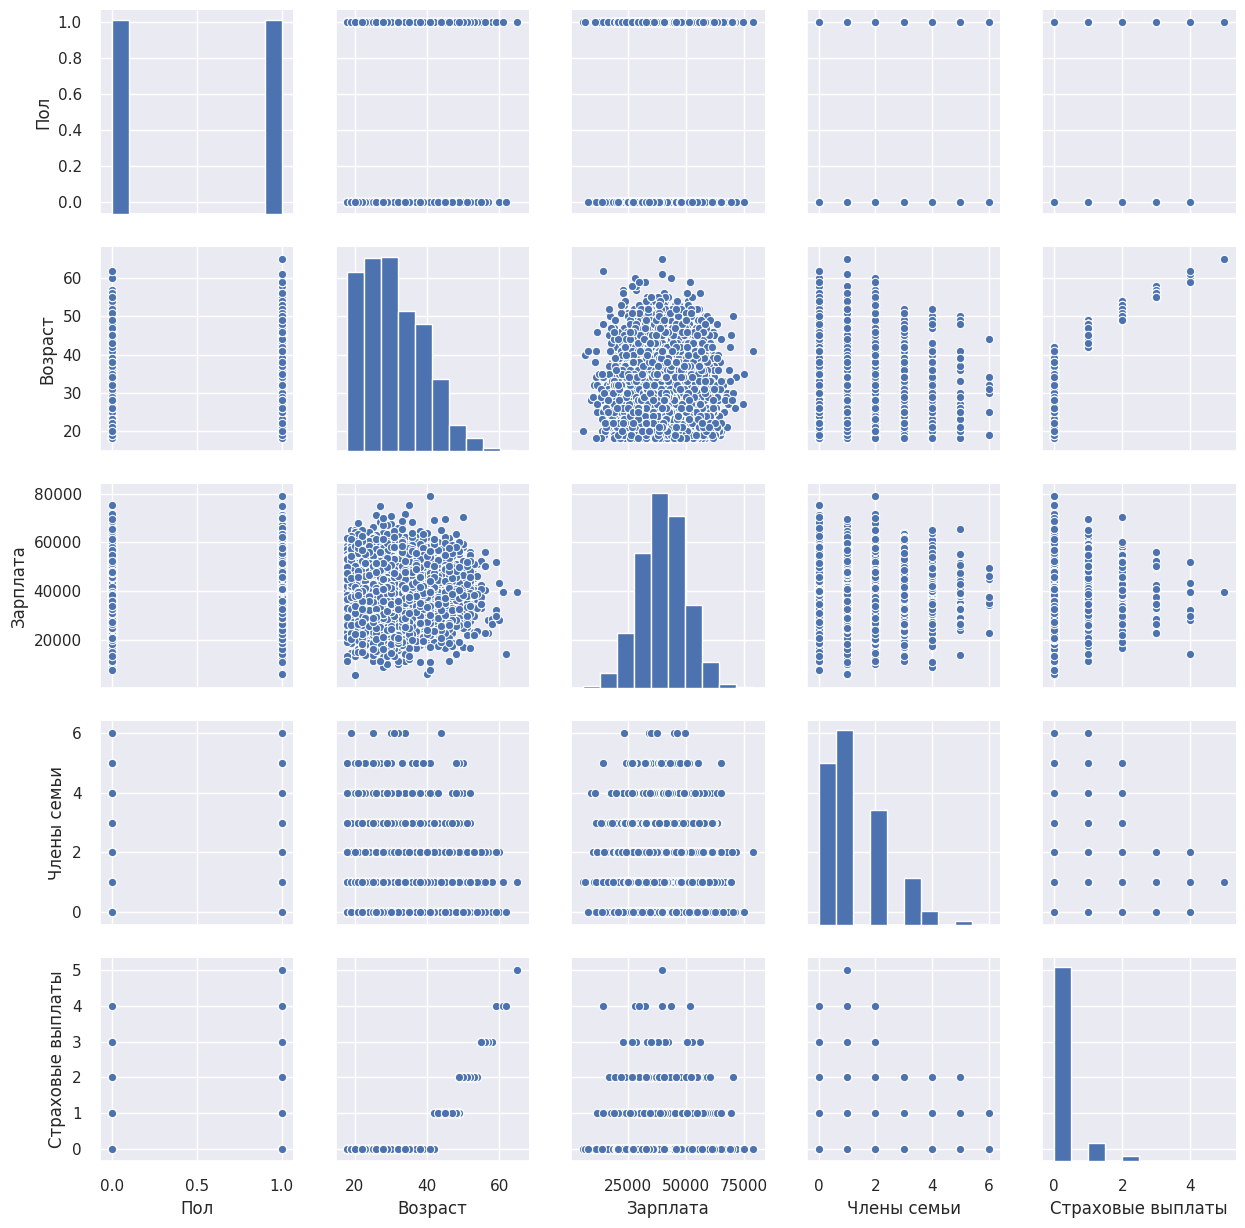

In [6]:
# Проверим корреляцию между признаками и построим график типа scatterplot
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

sns.set() 
sns.pairplot(df, size = 2.5)
plt.show();

#### Вывод

Данные "чистые" - принципиальной предобработки не требуется.   
Выявлена корреляция размера 0.65 между признаком `age` и целевым признаком `insurance_payments`

Рекомендуется:
    - переименовать названия колонок - перевести названия на английский язык, привести к нижнему регистру
    - преобразовать тип колонок `age` и `salary` из float -> int

<a href='#Назад к оглавлению'> Назад к оглавлению</a>

<a id='Предобработка данных и разбиение на выборки'></a>

### Часть 2. Предобработка данных и разбиение на выборки

In [7]:
# Напечатаем список колонок
df.columns

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

In [8]:
# Переименуем колоноки
df.columns = ['gender','age', 'salary', 'family_member', 'insurance_payments']
df.head()

,gender,age,salary,family_member,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [9]:
# Преобразуем колонки 'age' и 'salary' из float в int
df['age'] = df['age'].astype('int64')
df['salary'] = df['salary'].astype('int64')

In [10]:
# В переменную features поместим датасет удалив колонку insurance_payments
# Отделим от датасета колонку insurance_payments с целевой переменной и поместим её в переменную target
features = df.drop(['insurance_payments'], axis=1)
target = df['insurance_payments']

In [11]:
# Поделим данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42)

In [12]:
# Посмотрим на размер получившихся выборок
for name, data in {'features_train': features_train, 
                   'features_test':features_test, 
                   'target_train':target_train, 
                   'target_test':target_test}.items():
    print("Размер выборки  %s:"  % (name),(data.shape))

Размер выборки  features_train: (3750, 4)
Размер выборки  features_test: (1250, 4)
Размер выборки  target_train: (3750,)
Размер выборки  target_test: (1250,)


#### Вывод

- Переименованы названия колонок - названия переведены на английский язык и приведены к нижнему регистру
- Преобразован тип колонок `age` и `salary` из float -> int
- Датасет разбит на обучающую и тестовую выборки

<a href='#Назад к оглавлению'> Назад к оглавлению</a>

<a id='Разработка модели Линейной регрессии'></a>

### Часть 3. Разработка модели Линейной регрессии

In [13]:
# Обучим модель Линейной регрессии на первоначальном наборе данных
model = LinearRegression()
model = model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики: ', round(r2_score(target_test, predictions),3))

Значение метрики:  0.425


In [14]:
# Выведем значения коэффициентов расчитанных моделью
coefficients = pd.concat([pd.DataFrame(features_train.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients.columns = ['features', 'coef']
coefficients.set_index('features').style.format({'coef': '{:.8f}'})

,coef
features,
gender,0.00492432
age,0.03515272
salary,-0.00000025
family_member,-0.01491401


#### Вывод

- Обучена модель Линейной регрессии
- Проанализированы значения коэффициентов расчитанных моделью

<a href='#Назад к оглавлению'> Назад к оглавлению</a>

### Часть 4. Анонимизация клиентских данных 

<a id='4.1 Теоретическое обоснование'></a>

#### 4.1  Теоретическое обоснование

Введем следующие обозначения:

$X' = X*P$ - матрица признаков после "шифрования", вектор целевого признака $y$ шифровать не будем.

Используя следующие свойства операций с матрицами:

$$(A B)^T = B^T A^T$$

$$(A B)^{-1} = B^{-1} A^{-1}$$

$$(A^T)^{-1} = (A^{-1})^T$$

а также формулу обучения, получаем следующую формулу предсказания для зашифрованных данных:

$$a_p = X_p w_p = X_p (X_p^T X_p)^{-1} X_p^T y =$$

$$= (X P)\,((X P)^T X P)^{-1} (X P)^T y =$$

$$= (X P)\,(P^T (X^T X) P)^{-1} P^T X^T y =$$

$$= (X P)\,P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y =$$

$$= X (P P^{-1}) (X^T X)^{-1} (P P^{-1})^T X^T y =$$

$$= X (X^T X)^{-1} X^T y =$$

$$= X w =$$

$$= a$$

Получили $a_p = a$

**Вывод: при шифровании признаков $X$ обратимой матрицей $P$ предсказания $a$ не меняются.**

<a href='#Назад к оглавлению'> Назад к оглавлению</a>

<a id='4.2 Зашифровка данных путем умножения матрицы признаков на обратимую матрицу'></a>

#### 4.2 Зашифровка данных путем умножения матрицы признаков на обратимую матрицу

Формула зашифровки данных:

$$
X' = X*P
$$

Обозначения:
- $X'$ — матрица преобразованных признаков 

- $X$ — матрица признаков 

- $P$ — матрица, на которую умножаются признаки


In [15]:
# Преобразуем выборки в матрицы и вектора
features_train_m = features_train.values
features_test_m = features_test.values
target_train_v = target_train.values
target_test_v = target_test.values

In [16]:
# Напишем класс, который осуществляет преобразование переданной матрицы, путем ее умножения на обратимую матрицу
class Preparer():
    
    def check_inv(Z):
    
        answer = False

        while answer == False:

            Z_rev = np.linalg.inv(Z)           

            if np.allclose(np.dot(Z, Z_rev), np.eye(Z.shape[0])) is True:
                answer = True
            else:
                answer = False
   
        return answer
    
    
    def fit_transform(self, X, random_state=None):
                  
        if random_state:
            np.random.seed(random_state)
            
        X_d = X.shape[1]
        Z = np.random.normal(size=(X_d, X_d))
               
        if Preparer.check_inv(Z) == True:      
        
            result = X.dot(Z)
        
        return result  

In [17]:
# Применим класс Preparer для анонимизации данных
features_train_m1 = Preparer().fit_transform(features_train_m, random_state=12345)
features_test_m1 = Preparer().fit_transform(features_test_m, random_state=12345)
print(features_train_m1)

[[ 30981.54375746  50154.05220105  40492.17104265 -52098.50921712]
 [ 25653.93944628  41538.5539687   33542.89540551 -43156.79634258]
 [ 33596.22048734  54391.93030476  43916.61485843 -56505.6609881 ]
 ...
 [ 35834.04434805  58012.64360695  46837.31618821 -60264.13095022]
 [ 27672.5762285   44793.46837209  36160.64445845 -46525.59592439]
 [ 34156.70985423  55280.21991015  44625.37522905 -57408.14369811]]


In [18]:
# Обучим модель Линейной регрессии на преобразованном наборе данных
model_prep = LinearRegression()
model_prep = model_prep.fit(features_train_m1, target_train_v)
predictions_prep = model_prep.predict(features_test_m1)
print('Значение метрики: ', round(r2_score(target_test_v, predictions_prep),3))

Значение метрики:  0.425


In [19]:
# Выведем значения коэффициентов расчитанных моделью
coefficients_2 = pd.concat([pd.DataFrame(features_train.columns),pd.DataFrame(np.transpose(model_prep.coef_))], axis = 1)
coefficients_2.columns = ['features', 'coef']
coefficients_2.set_index('features').style.format({'coef': '{:.8f}'})

,coef
features,
gender,0.01733412
age,0.00171981
salary,-0.01501529
family_member,0.00027076


#### Вывод

Качество линейной регрессии не изменилось - значение метрики в исходной и преобразованной моделях составило 0.425.   

Проверка коэффициентов показала, что в случае использования анонимированных данных изменилось распределение весов между признаками - если ранее наибольший вес был у признака `age`, то у зашифрованных данных более важным оказался признак `geder`, что является плохим показателем для зашифровки данных, т.к. может повлиять на принятие бизнес-решений основанных на важности признаков.   

Требуется продолжить работу по поиску оптимального метода шифрования

<a href='#Назад к оглавлению'> Назад к оглавлению</a>

<a id='4.3 Зашифровка данных путем умножения на вектор и прибавления константного значения'></a>

#### 4.3 Зашифровка данных путем умножения на вектор и прибавления константного значения

Альтернаятивная формула зашифровки данных:

$$
X' = X * p + C_1
$$

Обозначения:

- $X'$ — матрица преобразованных признаков 

- $X$ — матрица признаков 

- $р$ — вектор рандомных значений, на который умножаются признаки

- $C_1$ — константа, которая прибавляется к значениям признаков

**Обоснование:** Использование методов алгебры матриц, таких как умножение матрицы на вектор и прибавление константного значения обеспечивает надежное закрытие информации и возможность дешифровки при наличии технологии зашифровки.

In [20]:
# Напишем класс, который осуществляет преобразование переданной матрицы, путем ее умножения на вектор и прибавления константы
class Preparer2():
    
    def fit_transform2(self, X, random_state=None):
                  
        if random_state:
            np.random.seed(random_state)
            
        X_d = X.shape[1]
        Z_v = np.random.rand(X_d)
                       
        result = (X * Z_v) + 93
        
        return result  

In [21]:
# Применим класс Preparer2 для анонимизации данных
features_train_m2 = Preparer2().fit_transform2(features_train_m, random_state=12345)
features_test_m2 = Preparer2().fit_transform2(features_test_m, random_state=12345)
print(features_train_m2)

[[  93.          103.75676886 7486.53622942   93.        ]
 [  93.          100.27663776 6217.49642885   93.20456028]
 [  93.          103.75676886 8111.86018912   93.        ]
 ...
 [  93.92961609  105.02227107 8645.22474298   93.        ]
 [  93.92961609  103.4403933  6695.68533921   93.        ]
 [  93.          107.23689996 8240.6033573    93.40912056]]


In [22]:
# Обучим модель Линейной регрессии на преобразованном наборе данных
model_prep2 = LinearRegression()
model_prep2 = model_prep2.fit(features_train_m2, target_train_v)
predictions_prep2 = model_prep2.predict(features_test_m2)
print('Значение метрики: ', round(r2_score(target_test_v, predictions_prep2),3))

Значение метрики:  0.425


In [23]:
# Выведем значения коэффициентов расчитанных моделью
coefficients_3 = pd.concat([pd.DataFrame(features_train.columns),pd.DataFrame(np.transpose(model_prep2.coef_))], axis = 1)
coefficients_3.columns = ['features', 'coef']
coefficients_3.set_index('features').style.format({'coef': '{:.8f}'})

,coef
features,
gender,0.00529716
age,0.11111073
salary,-0.00000134
family_member,-0.07290765


#### Вывод

Качество линейной регрессии не изменилось - значение метрики в исходной и преобразованной моделях составило 0.425.   

Проверка коэффициентов показала, что в случае использования анонимированных данных распределение весов не изменилось. Данный алгоритм зашифровки данных отвечает предъявляемым требованиям.

<a id='5 Общий вывод'></a>

### Часть 5. Общий вывод

Опробованы два метода преобразования данных. В обоих случаях рассматриваемая метрика оставалась неизменной - 0.425, но в случае использования метода умножения на обратимую матрицу оказывалось влияние на распределение весов между признаками - признаком, которому присваивался максимальный вес становился `gender` вместо `age`, что является критичным для поставленной задачи. 

Для зашифровки данных предлагается метод:

$$
X' = X * p + C_1
$$

Где:

- $X'$ — матрица преобразованных признаков 

- $X$ — матрица признаков 

- $р$ — вектор рандомных значений, на который умножаются признаки

- $C_1$ — константа, которая прибавляется к значениям признаков

Данный метод доказал свою эффективность по обоим параметрам: значение метрики и распределение весов (остались неизменными).

<a href='#Назад к оглавлению'> Назад к оглавлению</a>